In [1]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
from PIL import Image
import os
from skimage import filters

%matplotlib inline

In [29]:
im = io.imread('images/image_00003.jpg')

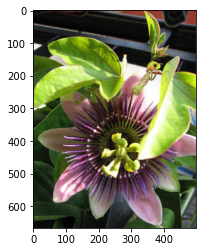

In [30]:
plt.imshow(im); plt.show()

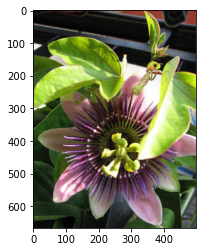

In [31]:
plt.imshow(im, cmap='gray')

In [32]:

laplacian = cv2.Laplacian(im,cv2.CV_64F)

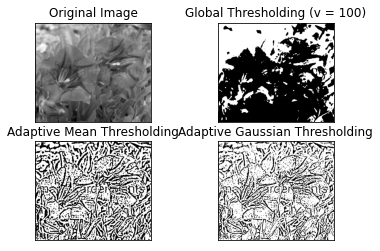

In [49]:
img = cv2.imread('images/image_05238.jpg',0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,120,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 100)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [7]:
def get_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [26]:
image_path = list_files[0]
img = cv2.imread(image_path)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-h4wtvo23\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [44]:
a = cv2.imread('102flowers/image_00001.jpg')
plt.imshow(a)

TypeError: Image data of dtype object cannot be converted to float

In [38]:
get_image('102flowers/image_00001.jpg')

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-h4wtvo23\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [27]:
img

In [8]:
def remove_green (image_path):
  img = get_image(image_path)
  _, threshold = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)
  
  for row in range(len(threshold)):
    for col in range(len(threshold[row])):
      if (list(threshold[row][col]) == [0,255,0] ): #or list(threshold[row][col]) == [255,255,0]
        threshold[row][col] = [0,0,0]

  plt.subplot(1,2,1),plt.imshow(img)
  plt.subplot(1,2,2),plt.imshow(threshold)

  return threshold

In [374]:
original = cv2.imread('images/image_00064.jpg')
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

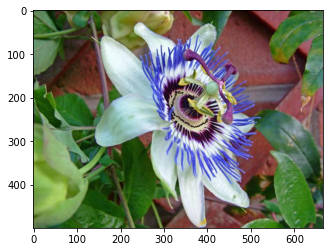

In [350]:
plt.imshow(original)

In [52]:
def binary_mask_image(image_path):

    path = '102flowers/'+image_path
    image_no_green = Image.fromarray((remove_green(path)))
    image_no_green.save('new_images/{}'.format(image_path))
    image = cv2.imread('new_images/{}'.format(image_path),0)
    os.remove('new_images/{}'.format(image_path))

    _,threshold_image = cv2.threshold(image,0,255,cv2.THRESH_BINARY)
    im_smooth = filters.rank.percentile(threshold_image, np.ones((21,21)), p0=0.5)

    original = get_image(path)
    mask = im_smooth / 255
    mask = mask.reshape(*mask.shape, 1)
    masked_image = original * mask

    image_mask = Image.fromarray(masked_image.astype(np.uint8))
    print("i'm saving masked image...")
    image_mask.save("mask/{}.jpg".format(image_path))
    
    plt.imshow(image_mask, cmap = 'gray')

In [53]:
list_files = os.listdir('D:/UNIVERSITA_2/Magistrale/AdvancedML/PROGETTO/102flowers')

In [51]:
for image in list_files:
    binary_mask_image(image)

hey


FileNotFoundError: [Errno 2] No such file or directory: '../new_images/102flowers/image_00001.jpg'

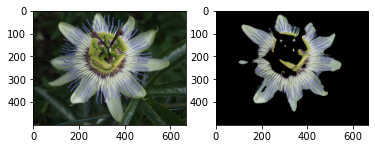

In [398]:
binary_mask_image('image_00064.jpg')

In [375]:
mask = im_order / 255
mask = mask.reshape(*mask.shape, 1)
dst = original * mask

In [376]:
image_mask = Image.fromarray(dst.astype(np.uint8))

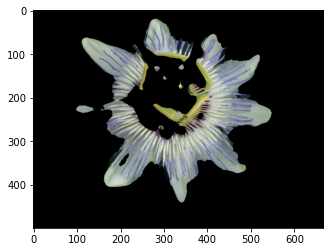

In [377]:
plt.imshow(image_mask)

In [266]:
image_mask.save("image_mask.jpeg")

In [212]:
from skimage import filters

In [ ]:
result = cv2.bitwise_and(original, th1)

In [182]:
original[0]

array([[227, 211, 212],
       [230, 214, 215],
       [234, 218, 219],
       ...,
       [ 94,  99, 190],
       [ 92,  97, 188],
       [ 92,  97, 188]], dtype=uint8)

In [186]:
dst[0]

array([[227., 211., 212.],
       [230., 214., 215.],
       [234., 218., 219.],
       ...,
       [ 94.,  99., 190.],
       [ 92.,  97., 188.],
       [ 92.,  97., 188.]])

In [163]:
cv2.bitwise_and(original, dst)

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-h4wtvo23\opencv\modules\core\src\arithm.cpp:234: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'cv::binary_op'


In [ ]:
THRESH_MASK 

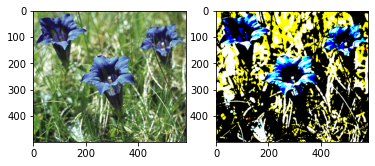

In [102]:
prova = Image.fromarray((remove_green('images/image_05237.jpg')))
prova.save("image_05237_nogreen.jpg")
image = cv2.imread("image_05237_nogreen.jpg",0)

In [106]:
cv2.imshow("img",img) 

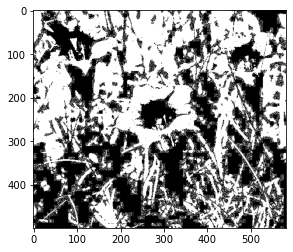

In [121]:
ret,th1 = cv2.threshold(image,5,255,cv2.THRESH_BINARY)
plt.imshow(th1, cmap = 'gray')

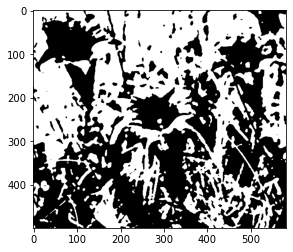

In [104]:
img = cv2.imread('images/image_05237.jpg',0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,120,255,cv2.THRESH_BINARY)
plt.imshow(th1, cmap = 'gray')

In [263]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [264]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [265]:
def get_colors(image, number_of_colors, show_chart):
  modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
  modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
  clf = KMeans(n_clusters = number_of_colors)
  labels = clf.fit_predict(modified_image)

  counts = Counter(labels)

  center_colors = clf.cluster_centers_
  # We get ordered colors by iterating through the keys
  ordered_colors = [center_colors[i] for i in counts.keys()]
  hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
  rgb_colors = [np.around(ordered_colors[i]) for i in counts.keys()]

  if (show_chart):
      plt.figure(figsize = (8, 6))
      plt.pie(counts.values(), labels = rgb_colors, colors = hex_colors)

  return rgb_colors

In [17]:
np.around(ordered_colors[1])

NameError: name 'ordered_colors' is not defined

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


[array([55., 24., 22.]),
 array([44., 77., 11.]),
 array([145., 111., 113.]),
 array([116., 138.,  53.]),
 array([247., 248., 240.]),
 array([105.,  65.,  57.]),
 array([ 75., 108.,  26.]),
 array([183., 158., 144.])]

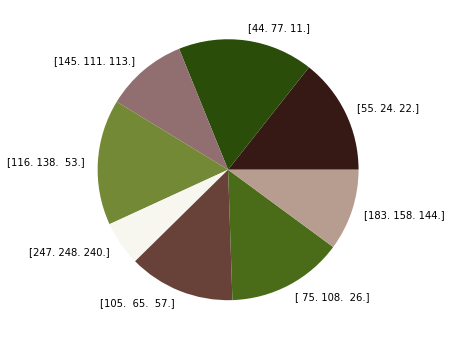

In [339]:
get_colors(get_image('images/image_00007.jpg'), 8, True)

In [340]:
from __future__ import print_function
import binascii
import struct
from PIL import Image
import numpy as np
import scipy
import scipy.misc
import scipy.cluster

NUM_CLUSTERS = 5

print('reading image')
im = Image.open('images/image_00003.jpg')
im = im.resize((150, 150))      # optional, to reduce time
ar = np.asarray(im)
shape = ar.shape
ar = ar.reshape(scipy.product(shape[:2]), shape[2]).astype(float)

print('finding clusters')
codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
print('cluster centres:\n', codes)

vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
counts, bins = scipy.histogram(vecs, len(codes))    # count occurrences

index_max = scipy.argmax(counts)                    # find most frequent
peak = codes[index_max]
colour = binascii.hexlify(bytearray(int(c) for c in peak)).decode('ascii')
print('most frequent is %s (#%s)' % (peak, colour))

reading image
finding clusters


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.product is deprecated and will be removed in SciPy 2.0.0, use numpy.product instead


cluster centres:
 [[177.30606282 207.97187728  79.07596786]
 [234.97028738 228.41354116 204.74281539]
 [ 28.52282057  31.84931176  21.12569428]
 [150.40282686 125.097655   128.73401863]
 [ 92.77478619  94.57127019  52.1271777 ]]
most frequent is [28.52282057 31.84931176 21.12569428] (#1c1f15)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: scipy.argmax is deprecated and will be removed in SciPy 2.0.0, use numpy.argmax instead


In [341]:
import imageio
c = ar.copy()
for i, code in enumerate(codes):
    c[scipy.r_[scipy.where(vecs==i)],:] = code
imageio.imwrite('clusters.png', c.reshape(*shape).astype(np.uint8))
print('saved clustered image')

saved clustered image


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.where is deprecated and will be removed in SciPy 2.0.0, use numpy.where instead
  after removing the cwd from sys.path.


In [337]:
ret,th1 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)

In [283]:
ret

100.0

In [284]:
th1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

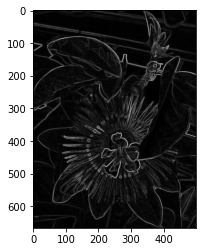

In [64]:
im_edge = filters.sobel(im)
plt.imshow(im_edge, cmap='gray')

In [42]:
im_edge.shape

(667, 500)

In [52]:
type(im_edge[0])

numpy.ndarray

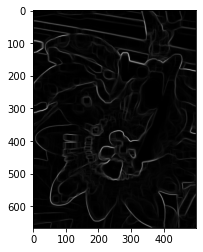

In [272]:
im = cv2.imread('images/image_00003.jpg',0)
im_smooth = filters.rank.percentile(im, np.ones((21,21)), p0=0.9)
im_edge = filters.sobel(im_smooth)
plt.imshow(im_edge, cmap='gray')

In [277]:
im_edge_contour = im_edge.copy()
for i in range(im_edge_contour.shape[0]):

  limits = np.where (im_edge_contour[i] >= 0.20)
  limits_clean = []
  if len(limits[0])!=0:
    limits_clean.append(limits[0][0])
    for limit_i in range(1,len(limits[0])):
      if limits[0][limit_i]-limits[0][limit_i - 1] > 1:
        limits_clean.append(limits[0][limit_i])

  im_edge_contour[i] = np.zeros(len(im_edge_contour[i]))


  if len(limits_clean)!=0:
    for limit_index in range(0,len(limits_clean),2):
      if (len(limits_clean) % 2 == 0):
        im_edge_contour[i][limits_clean[limit_index]:limits_clean[limit_index+1]] = 1
      else:
        im_edge_contour[i][limits_clean[limit_index]:len(im_edge_contour)] = 1

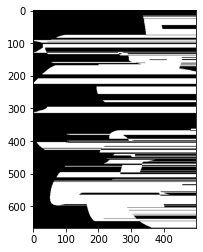

In [278]:
plt.imshow(im_edge_contour, cmap='gray')

In [194]:
limits

(array([], dtype=int64),)

In [187]:
im_edge_contour[300]

0.0

In [188]:
limits = np.where (im_edge_contour[300] >= 0.25)
limits_clean = []
limits_clean.append(limits[0][0])
for limit_i in range(1,len(limits[0])):
  if limits[0][limit_i]-limits[0][limit_i - 1] > 1:
    limits_clean.append(limits[0][limit_i])

im_edge_contour[300] = np.zeros(len(im_edge_contour[300]))


if len(limits_clean)!=0:
  for limit_index in range(0,len(limits_clean),2):
    if (len(limits_clean) % 2 == 0):
      im_edge_contour[300][limits_clean[limit_index]:limits_clean[limit_index+1]] = 1
    else:
      im_edge_contour[300][limits_clean[limit_index]:len(im_edge_contour[300])] = 1

In [199]:
im_edge_contour[300][400:700]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

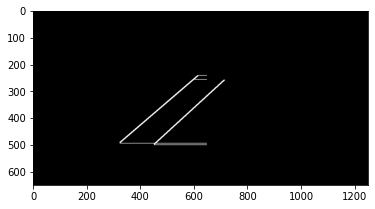

In [206]:
plt.imshow(im_edge_contour, cmap='gray')

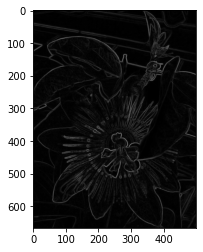

In [71]:
plt.imshow(im_edge_contour, cmap='gray')

In [1]:
from PIL import Image
import numpy as np
import cv2

In [9]:
def rotate (image_path):
  path = '../../../102flowers/'+image_path
  img = Image.fromarray(cv2.imread(path))
  img_180 = img.rotate(180)
  img_180.save('../../../rotated/{}.jpg'.format(image_path))

list_files = os.listdir('../../../102flowers/')
for image in list_files:
    print (image)
    rotate(image)